### 将安装好的libraries 加载进jupyter notebook的内核:
jupyter kernelspec install-self

keras 有两种backend, backend 即为keras底层是如何实现的是用的那种框架搭建的神经网络.一种是tensorflow 一种是theano
切换backend 的方式

pip uninstall -y <模块名> 这个命令可以删除一个模块, -y 表示不需要按确认。

pip --upgrade --force-reinstall <模块名> 这个命令将强制重装第三方包.

临时切换:
terminal中可输入:
KERAS_BACKEND=tensorflow python3 -c "from keras import backend"

In [1]:
# 使用 tensorflow backend
import os
os.environ["KERAS_BACKEND"]="tensorflow"

In [2]:
# 使用 theano backend
# import os
# os.environ["KERAS_BACKEND"]="theano"

In [3]:
import keras

Using TensorFlow backend.


## Linear regression
用一条直线来对数据进行拟合

In [4]:
# 导入模块
import numpy as np
np.random.seed(1337)
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

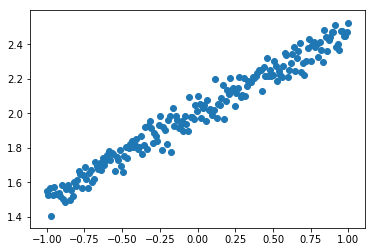

In [9]:
# 数据集准备
X = np.linspace(-1,1,200) # 从-1到1的x轴变化为200的直线
np.random.shuffle(X) # randomlize the data
Y = 0.5*X + 2 + np.random.normal(0,0.05,(200,))
plt.scatter(X,Y)
plt.show()
X_train,Y_train = X[:160],Y[:160]
X_test,Y_test = X[160:],Y[160:]

In [10]:
# create model
model = Sequential()
model.add(Dense(output_dim=1,input_dim=1)) # 需要指定第一层的input的形状

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
# 搭建模型
model.compile(loss="mse",optimizer="sgd") # 定义loss为mean square error, optimizer选用sgd

In [12]:
# training
print("training -----------")
for step in range(301):
    cost = model.train_on_batch(X_train,Y_train) # 训练时依据每一个batch进行训练
    if step%100==0:
        print("training cost:{}".format(cost))

training -----------
Instructions for updating:
Use tf.cast instead.
training cost:4.023179054260254
training cost:0.07316292077302933
training cost:0.003820077981799841
training cost:0.0026026952546089888


In [14]:
# test
print("testing----------------")
cost=model.evaluate(X_test,Y_test,batch_size=40)
weight,bias = model.layers[0].get_weights()
print("test cost",cost)
print("Weight={0},bias={1}".format(weight,bias))

testing----------------
40/40 [==============================] - 0s 500us/step
test cost 0.003187681781128049
Weight=[[0.48637906]],bias=[1.9993744]


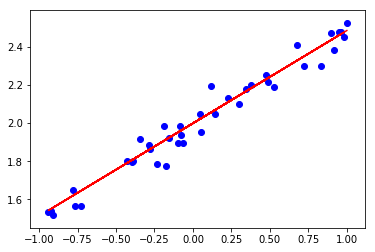

In [17]:
# visualize the model
Y_pred = model.predict(X_test)
plt.plot(X_test,Y_pred,color="red")
plt.scatter(X_test,Y_test,color="blue")
plt.show()